# ***ROC (Receiver operating characteristics)***

It is Restricted to the Binary classification which describes the model in better way than F1-Score


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
cancer = pd.read_csv("/content/drive/MyDrive/KP_Module (1)/Practical Machine Learning/Practise/Cases/Wisconsin/BreastCancer.csv",index_col=0)

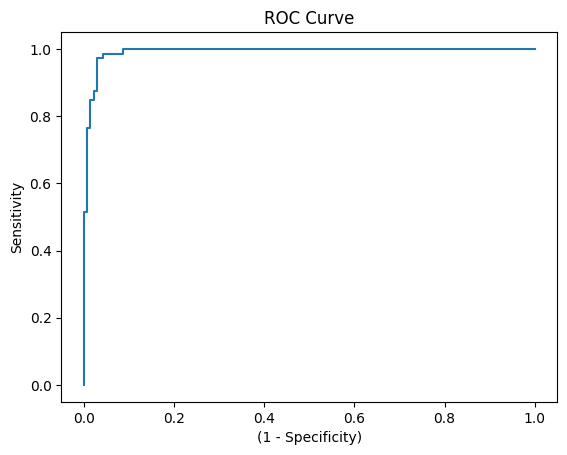

Roc Aread Under The Curve is :  0.9917471819645732


In [ ]:
# @title Default title text
lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class',axis = 1)
y = cancer['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 23,stratify = y)

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred_prob = lr.predict_proba(X_test)[:,1]

#ROC gives the how best model is for the certain probabili Threshould Value
#ROC curve gives the three Values FPR(1-Specificity), TPR
fpr,tpr,thres = roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.ylabel("Sensitivity")
plt.xlabel("(1 - Specificity)")
plt.show()


print("Roc Aread Under The Curve is : ",roc_auc_score(y_test,y_pred_prob))

# ***R-Squared Score***
In Scikit-Learn
1. For Classification Default Scoring measure is "Accuracy_score".
2. For Regression Default Scoring measure is "R2 score".

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
boston = pd.read_csv("/content/drive/MyDrive/KP_Module (1)/Practical Machine Learning/Practise/Datasets/Boston.csv")
X = boston.drop('medv',axis=1)
y = boston['medv']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

# for ElasticNet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
print("R2 Score is : ",r2_score(y_test,y_pred))

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV
elastic = ElasticNet()

kfold = KFold(n_splits=5,shuffle=True,random_state=23)
l1_rat = np.linspace(0.001,0.999,20)#[0.1,0.25,0.5,0.8,0.9]
alpha = np.linspace(0.001,4,20)#[0.1,0.5,1,2,2.5,3]
params={'alpha':alpha,'l1_ratio':l1_rat}

gcv = GridSearchCV(elastic,param_grid=params,cv=kfold,scoring='r2')

gcv.fit(X,y)
#print(gcv.cv_results_)
print(gcv.best_params_)

#R2 score is best score
print(gcv.best_score_)